In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline

In [2]:
# Libraries
print("\tImporting libraries...\n")
import sys; sys.path.append("..")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm

# ml libraries
from sklearn.metrics import r2_score, log_loss
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# dl libraries
import torch
# import torch.nn as nn
# from torch.utils.data import TensorDataset, DataLoader
# import pytorch_lightning as pl
torch.set_float32_matmul_precision('high')

# ext. libraries
import src.utils as utils
import src.models as models
from src.visuals import CustomVisualizer
print("\tImport complete!\n")

utils.set_plt_style()
device = utils.get_device_info()
seed = utils.set_all_seeds()

NUM_WORKERS = 23
DATASET_NAME = "mimic-iv-ecg"
DATASET_DIR = os.path.join("..", "data", DATASET_NAME)
OUTPUT_DIR = os.path.join("..", "out", DATASET_NAME)
SCORE_METRIC = 'test_r2'
score_metric = r2_score

	Importing libraries...



Seed set to 42



=== Environment Information ===
Python version: 3.12.2
PyTorch version: 2.6.0
NumPy version: 1.26.4
Platform: macOS-15.4.1-arm64-arm-64bit

	Import complete!


=== Device Information ===
CUDA available: False
Using device: cpu


=== Setting Random Seeds ===
Seed value: 42
Setting torch CPU seed...
Setting torch CUDA seed...
Setting numpy seed...
Configuring CUDNN...
Configuring PL...



In [12]:
X_train, y_train, X_test, y_test = torch.load(f"{DATASET_DIR}/dataset.pt")

X_train = X_train.flatten(start_dim=1)
X_test = X_test.flatten(start_dim=1)

y_k_train, y_k_test = y_train[:,0], y_test[:,0]
y_ca_train, y_ca_test = y_train[:,1], y_test[:,1]

	test_r2: 0.0139


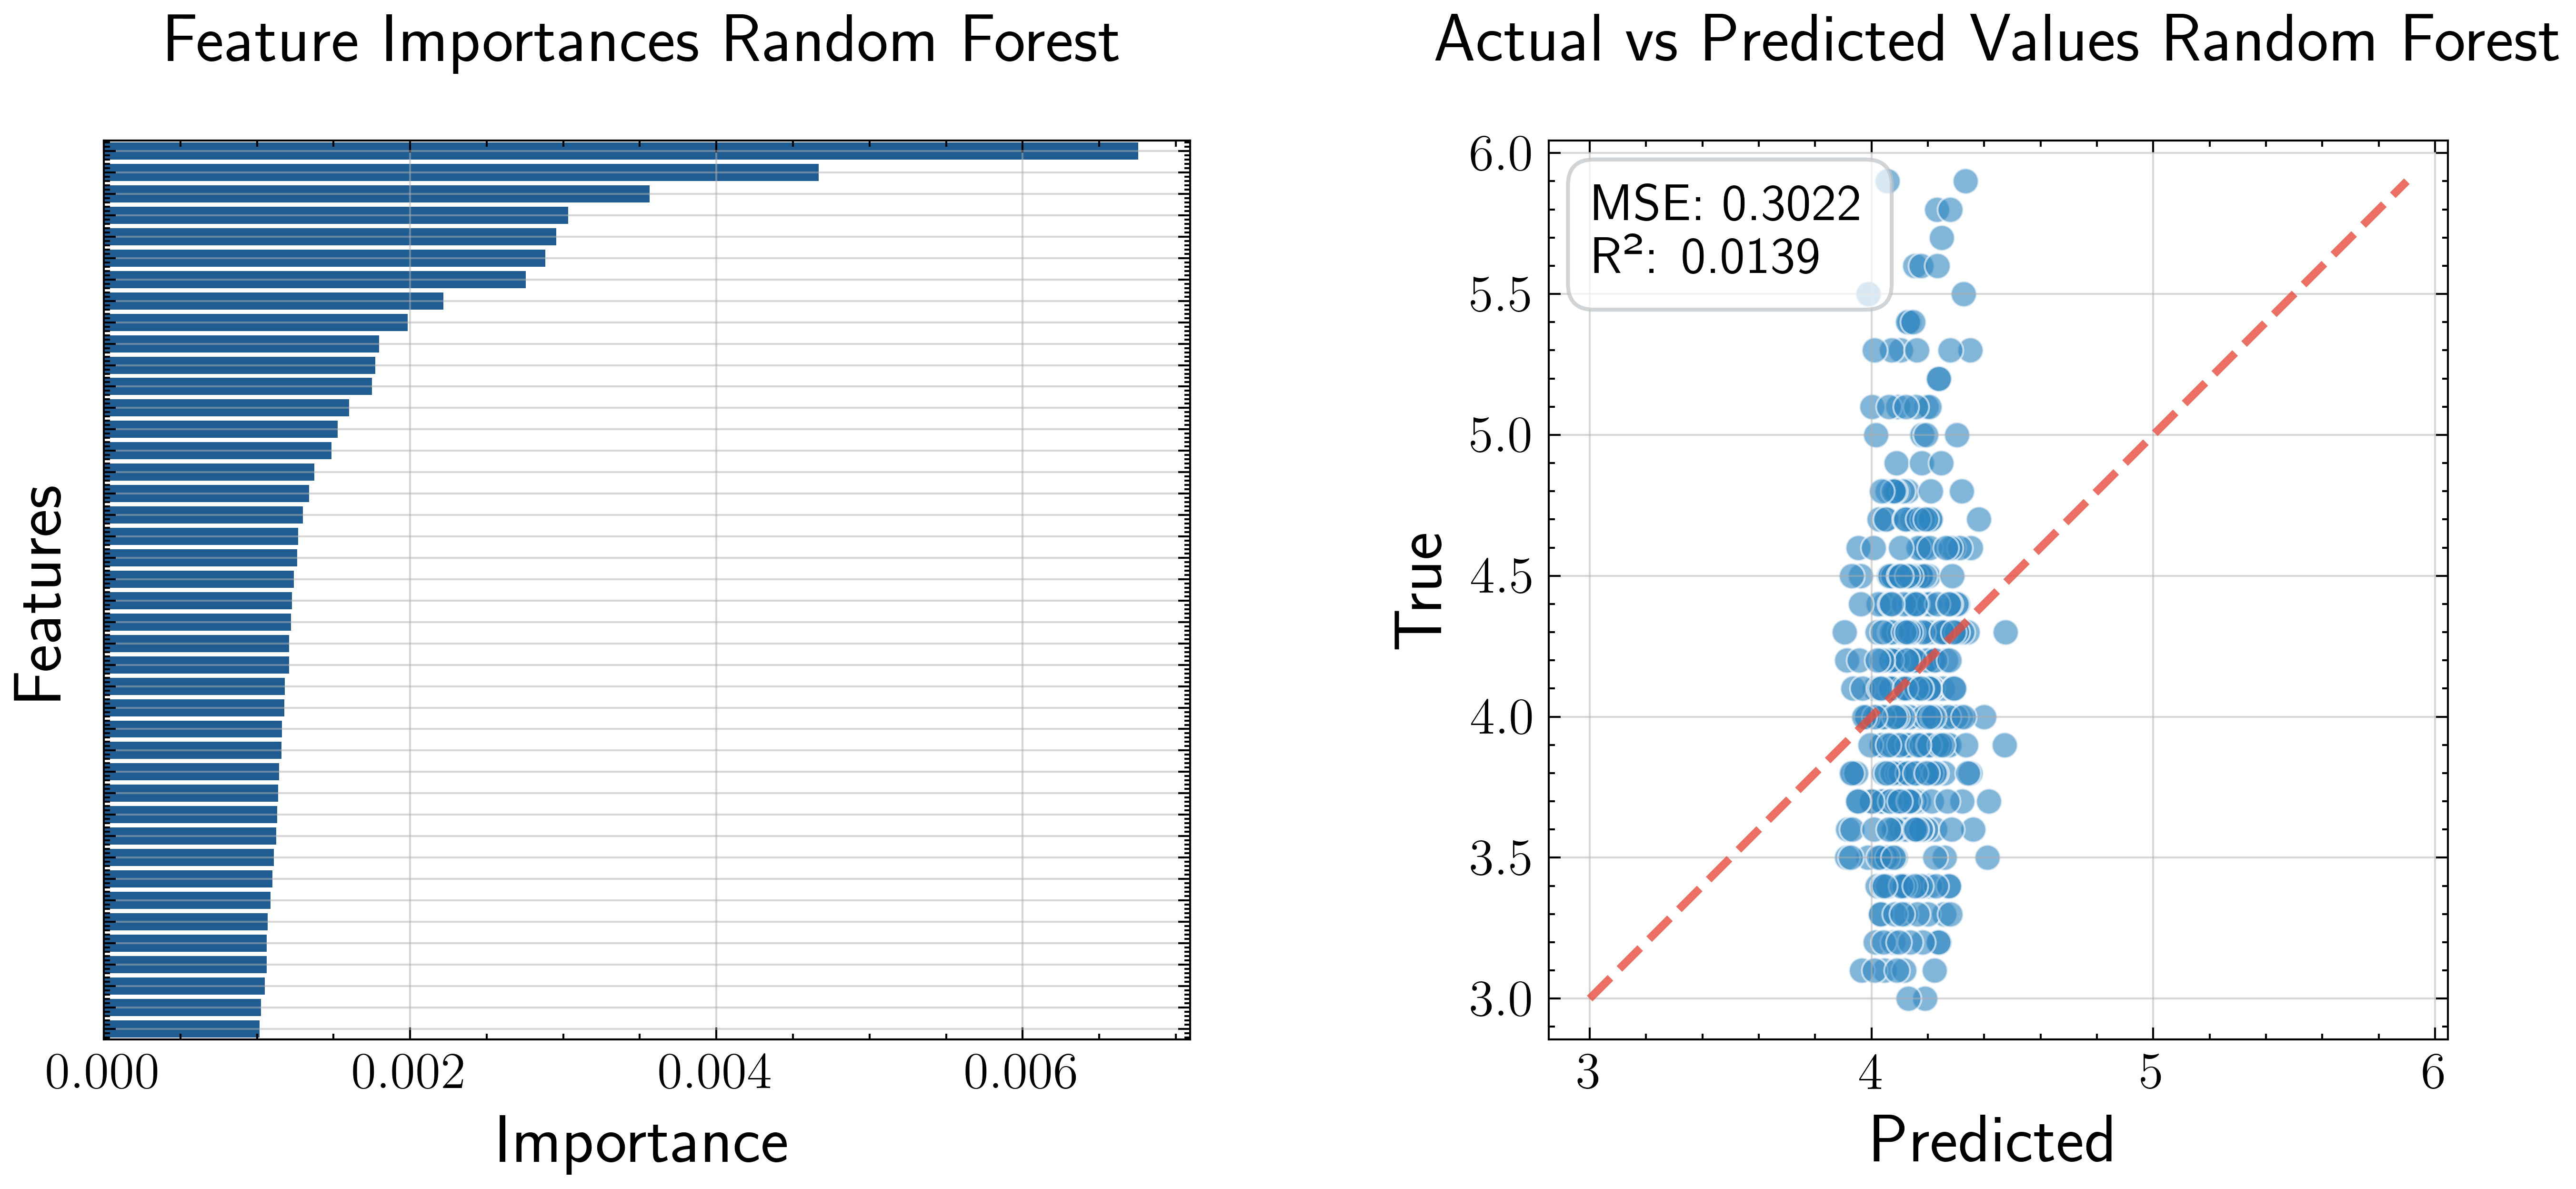

	test_r2: 0.0710


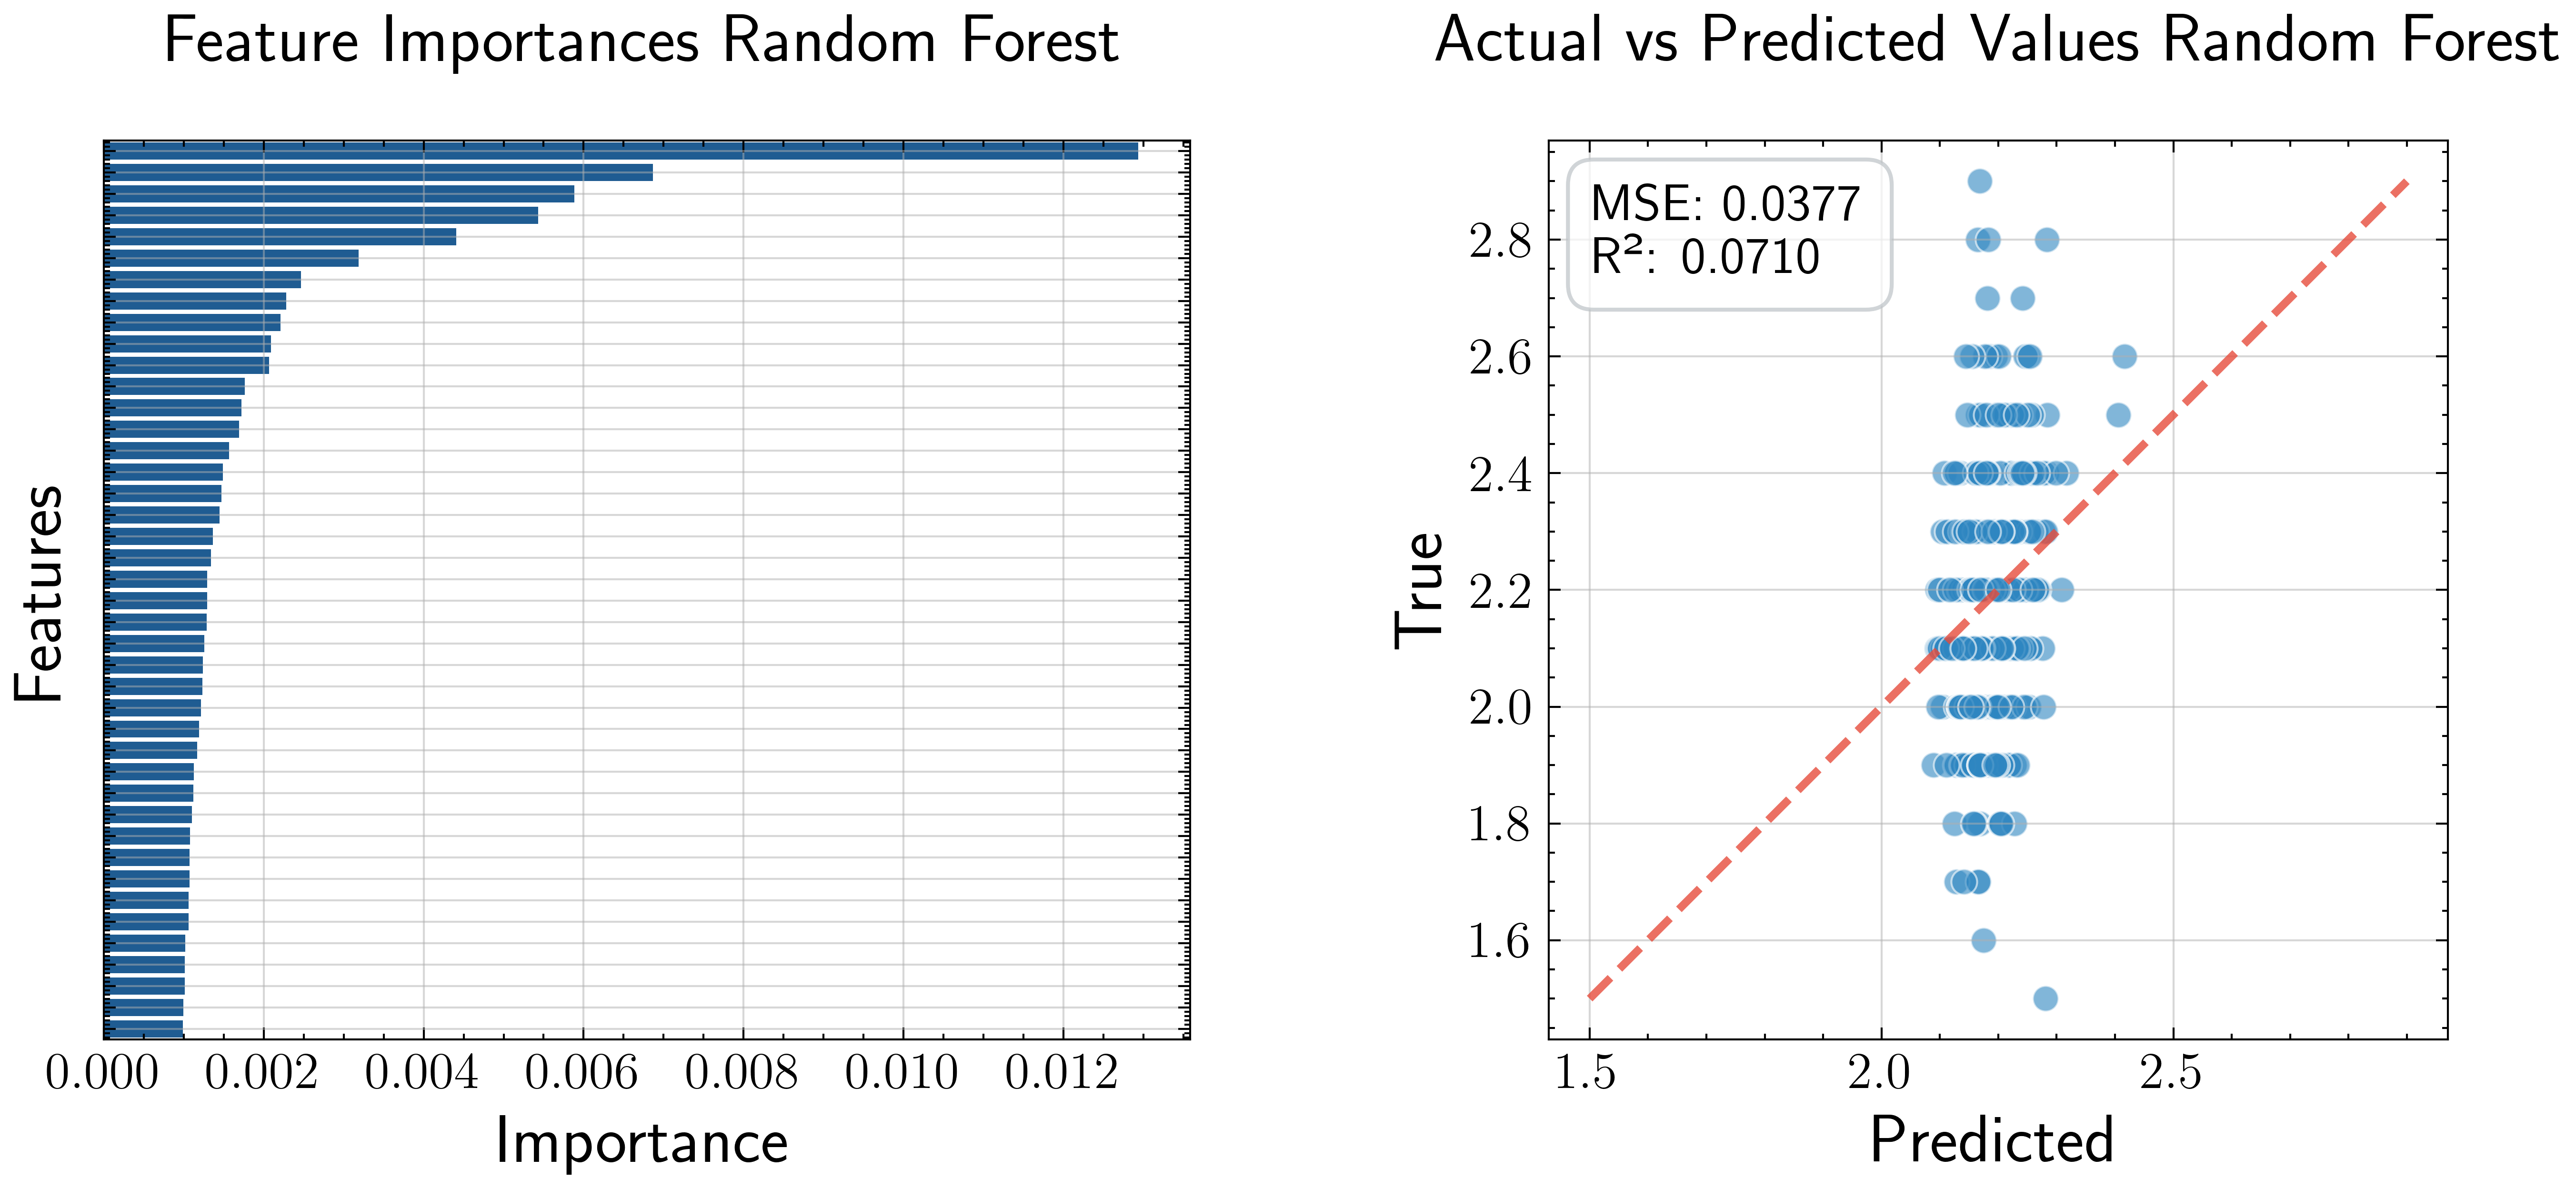

In [15]:
for y_train, y_test in zip([y_k_train, y_ca_train], [y_k_test, y_ca_test]):
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    test_score = score_metric(y_test, y_pred)
    print(f"\t{SCORE_METRIC}: {test_score:.4f}")

    cvi = CustomVisualizer(rf, "Random Forest")
    fig, axes = cvi.create_subplot_grid()
    cvi.plot_feature_importance(ax=axes[0, 0])
    cvi.plot_actual_vs_predicted((X_test.detach().numpy(), y_test.detach().numpy()), ax=axes[0, 1])
    plt.show()


	test_r2: -0.0293


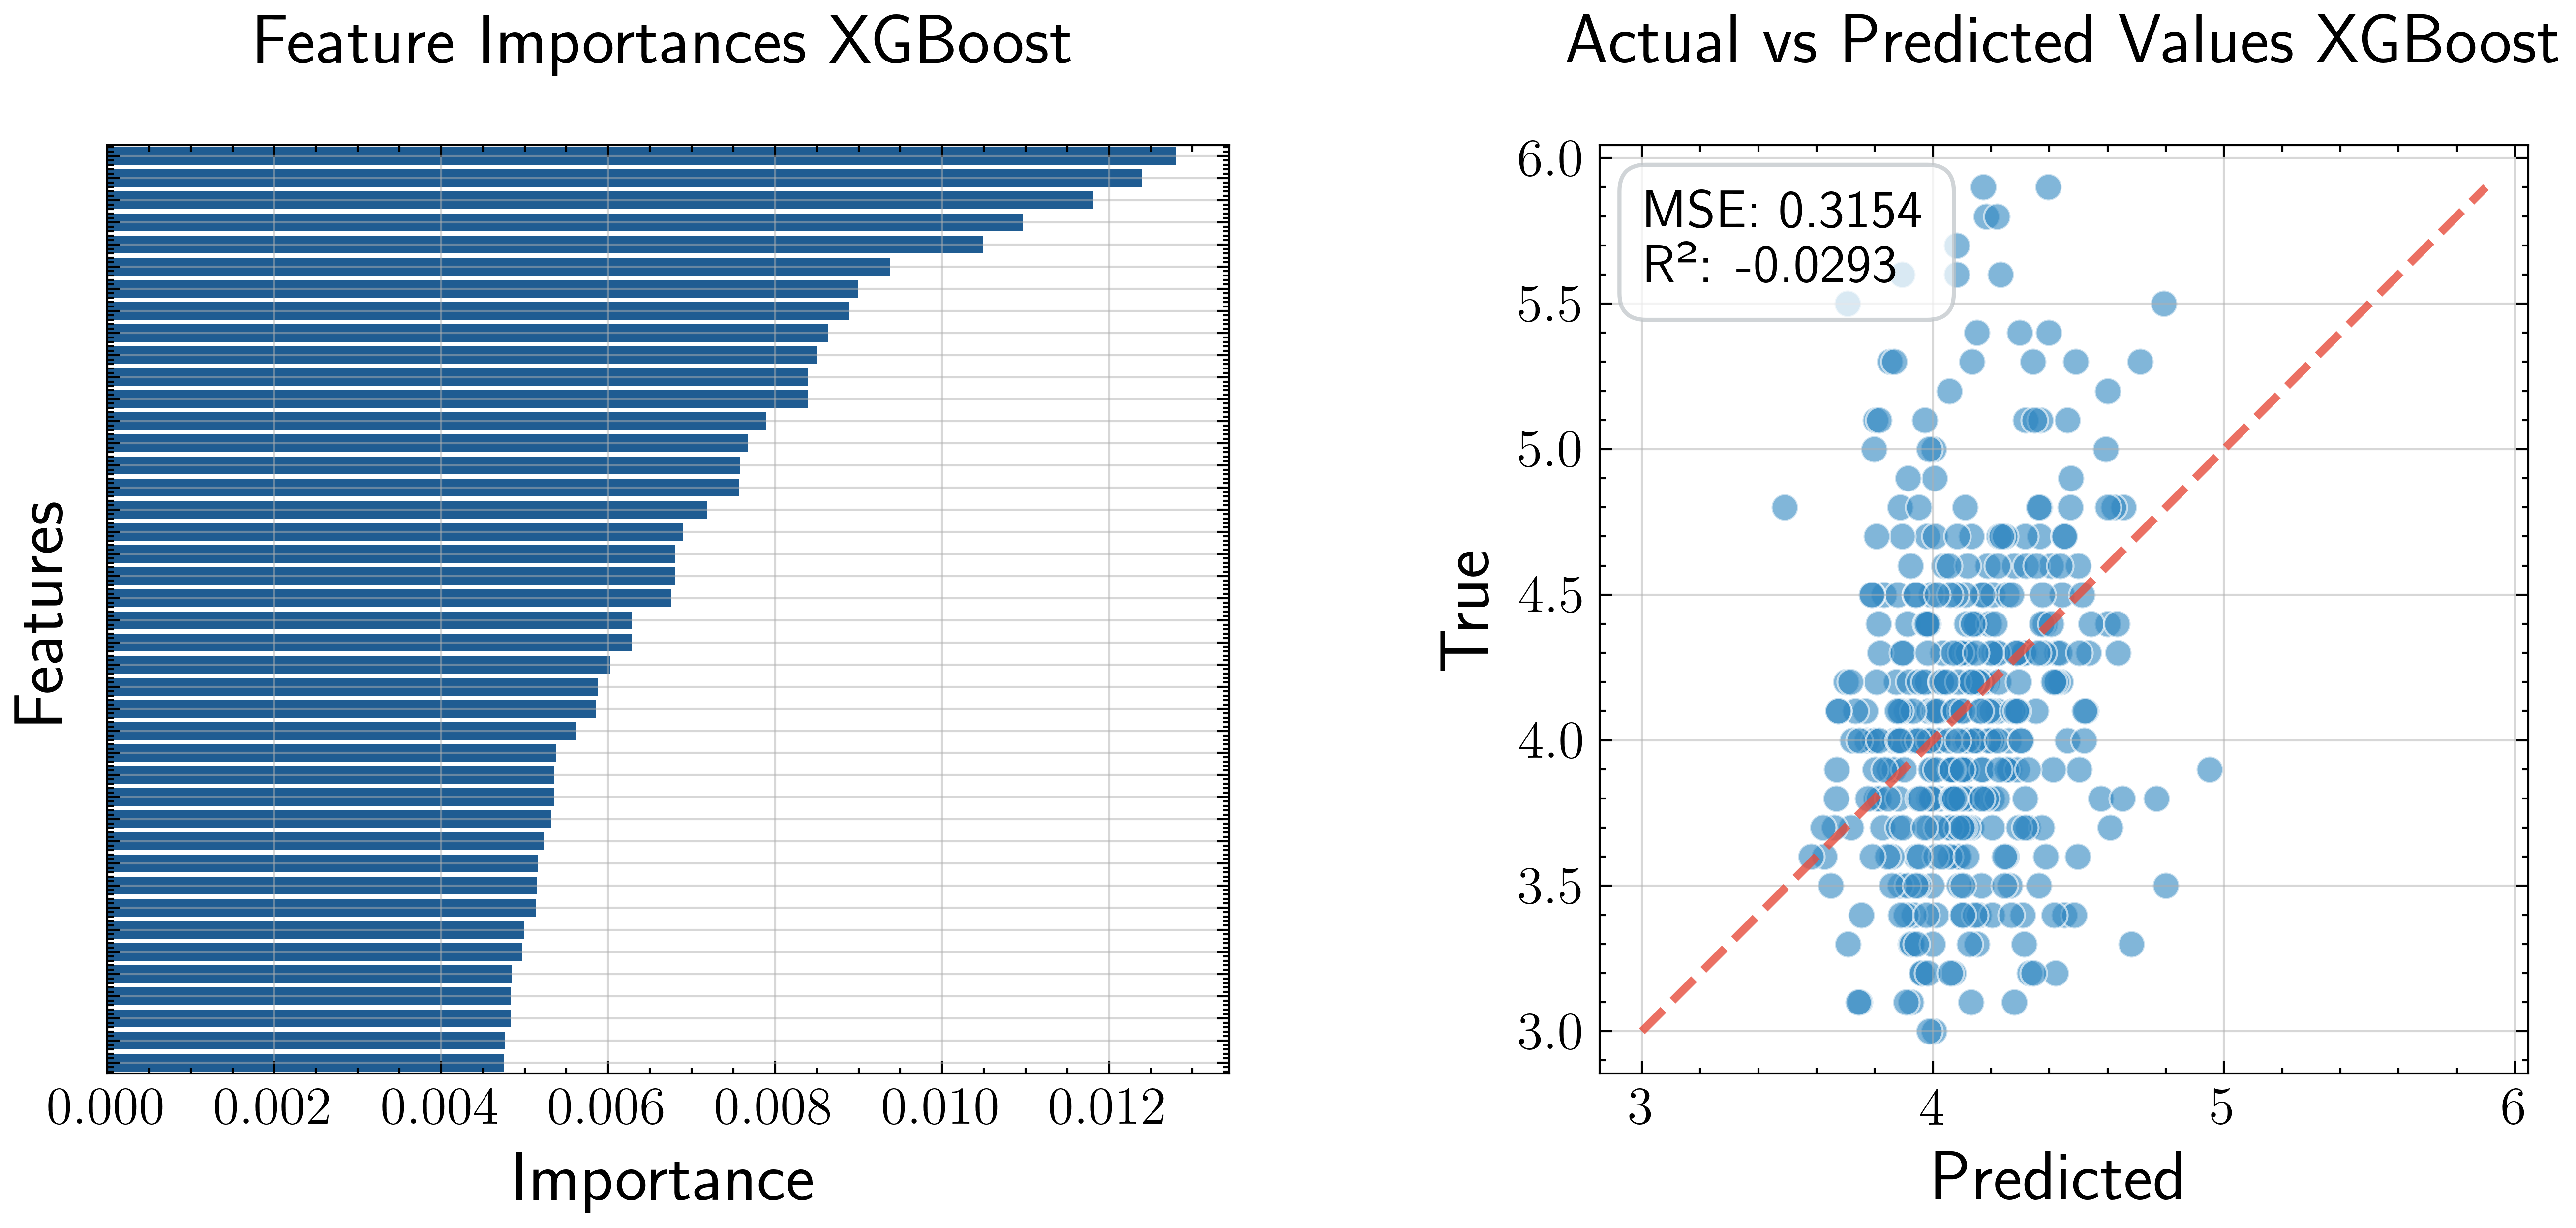

	test_r2: 0.0105


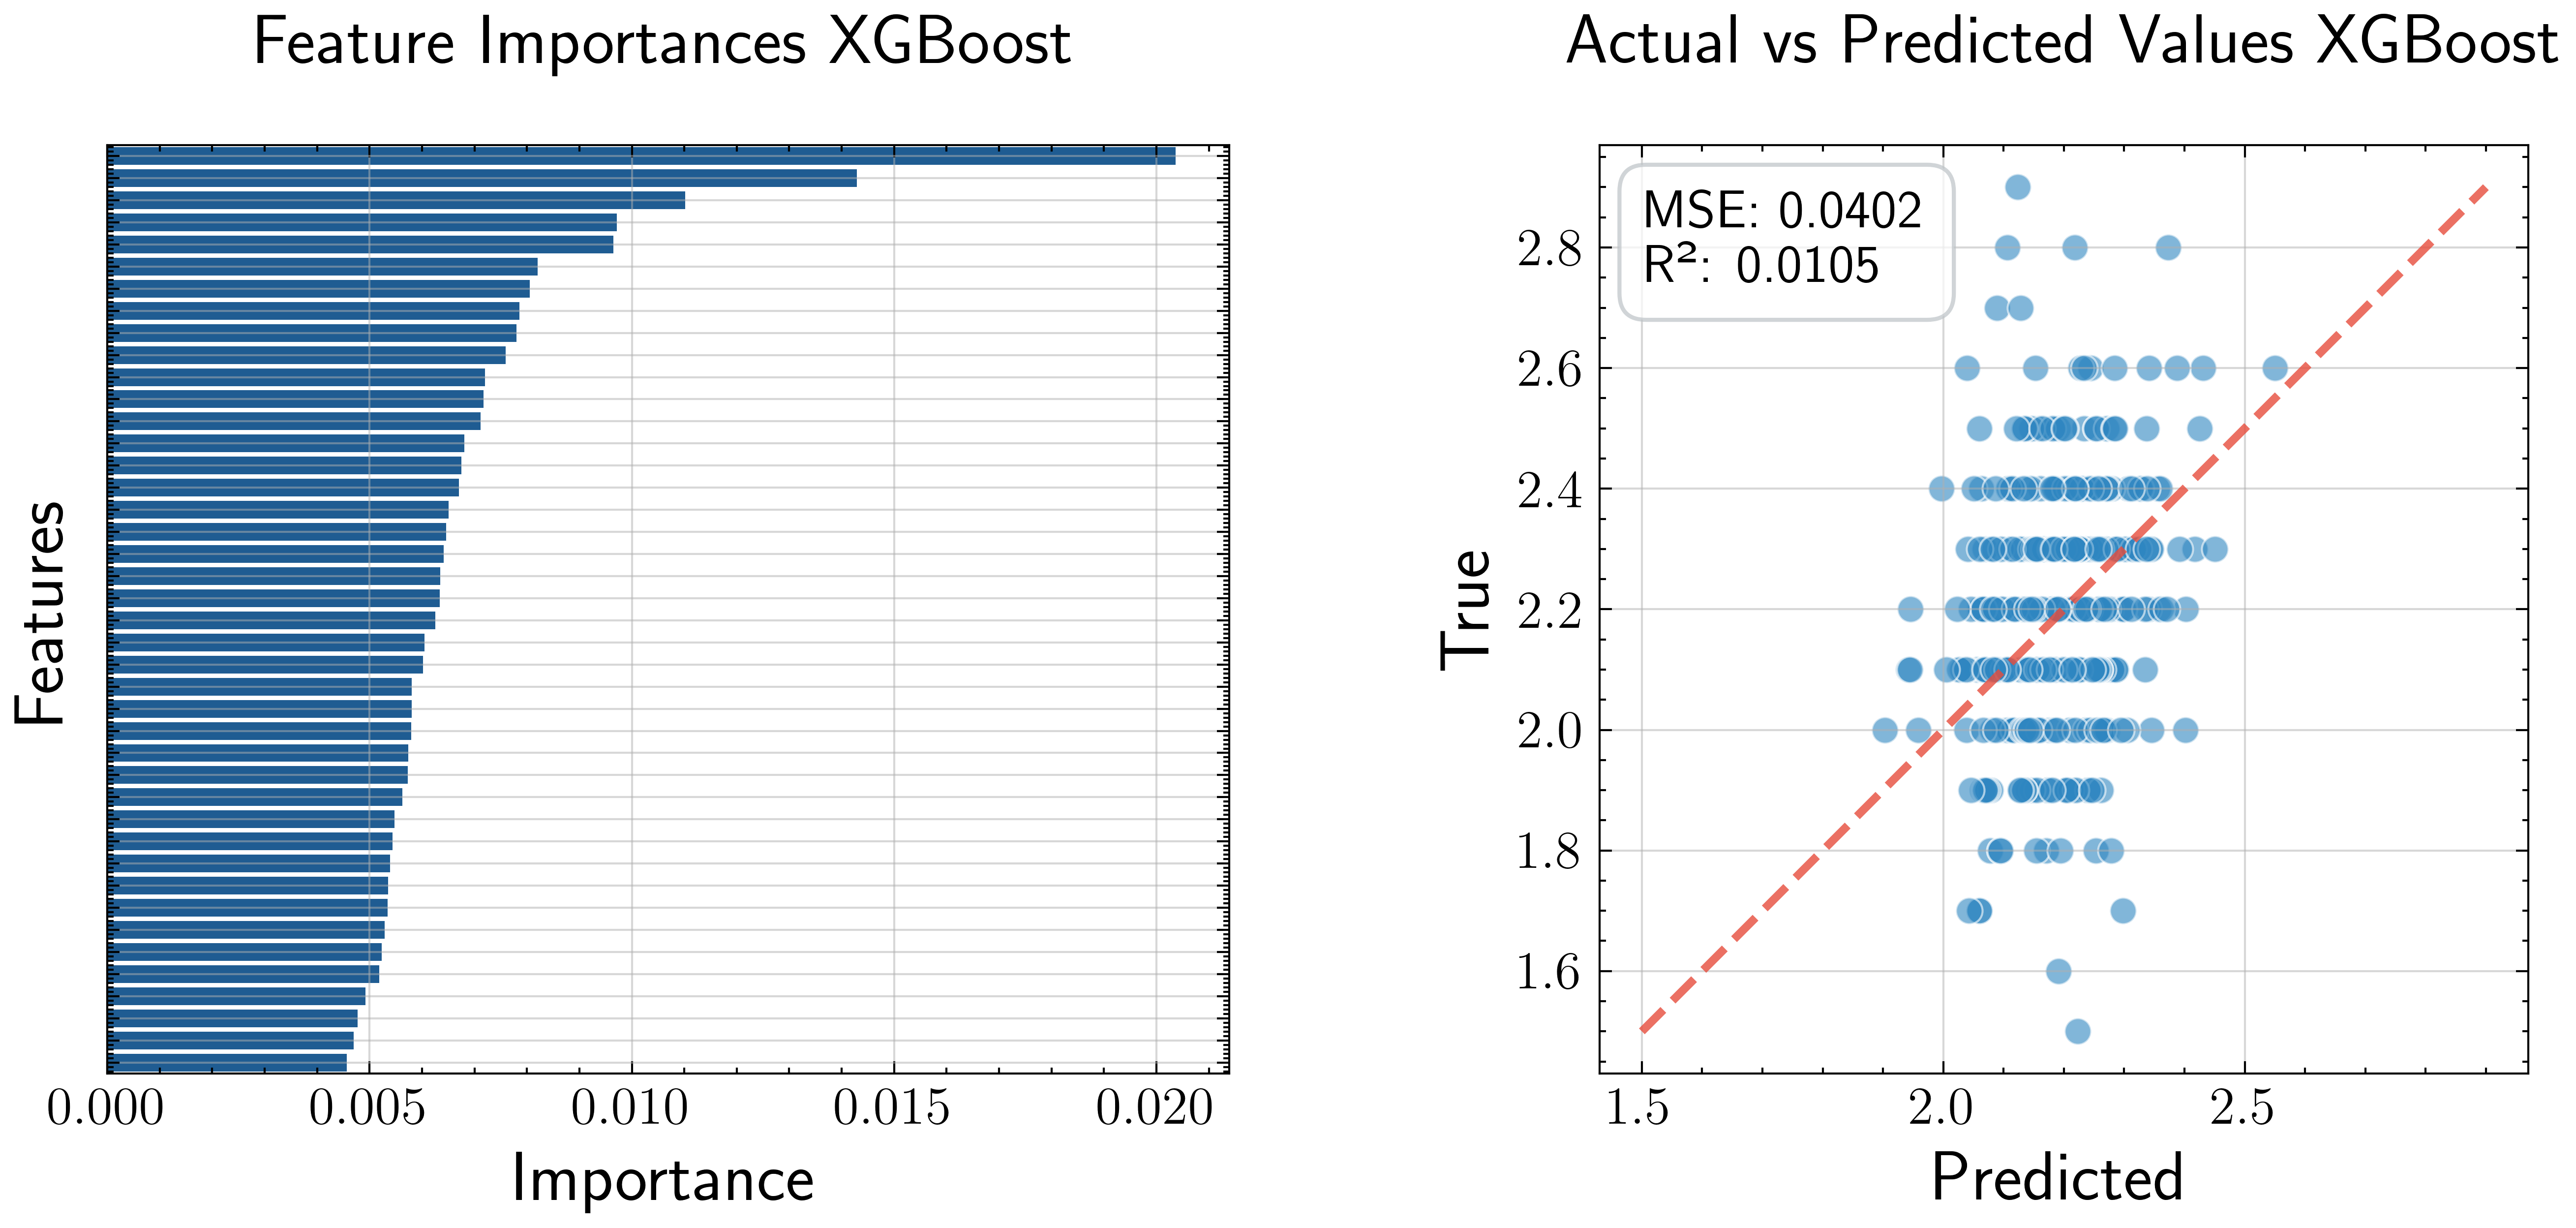

In [14]:
for y_train, y_test in zip([y_k_train, y_ca_train], [y_k_test, y_ca_test]):
    xgb = XGBRegressor(random_state=42, n_jobs=-1)

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    test_score = score_metric(y_test, y_pred)
    print(f"\t{SCORE_METRIC}: {test_score:.4f}")

    cvi = CustomVisualizer(xgb, "XGBoost")
    fig, axes = cvi.create_subplot_grid()
    cvi.plot_feature_importance(ax=axes[0, 0])
    cvi.plot_actual_vs_predicted((X_test.detach().numpy(), y_test.detach().numpy()), ax=axes[0, 1])
    plt.show()